Final Project Submission

Please fill out:
* Student name: Ice Asortse
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: James Irving (phd)
* Blog post URL:


# Employee Retention 

## Introduction

Employee retention has been a very big issue in organizations for a long time. A lot of businesses and organizations have struggled in keeping their employees happy and satisfied. We will attempt to use data available to us to create a model that can predict employee attrition.

## Importing neccessary libraries and dataset

In [1]:
# Importing the neccesarry libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
# Importing data from excelinto the notebook
df = pd.read_csv(r'C:\Users\Ice Asortse\FlatironData\projectmod5\dsc-mod-5-project-online-ds-ft-100719\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Cleaning data and pre-processing data

In [3]:
# Checking for null or missing data
df.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [4]:
# Checking data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

As we can see, the data contains both categorical and numerical data types.

In [5]:
print("Shape of the dataframe is {}".format(df.shape))

Shape of the dataframe is (1470, 35)


## Exploratory Data Analysis (EDA)

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


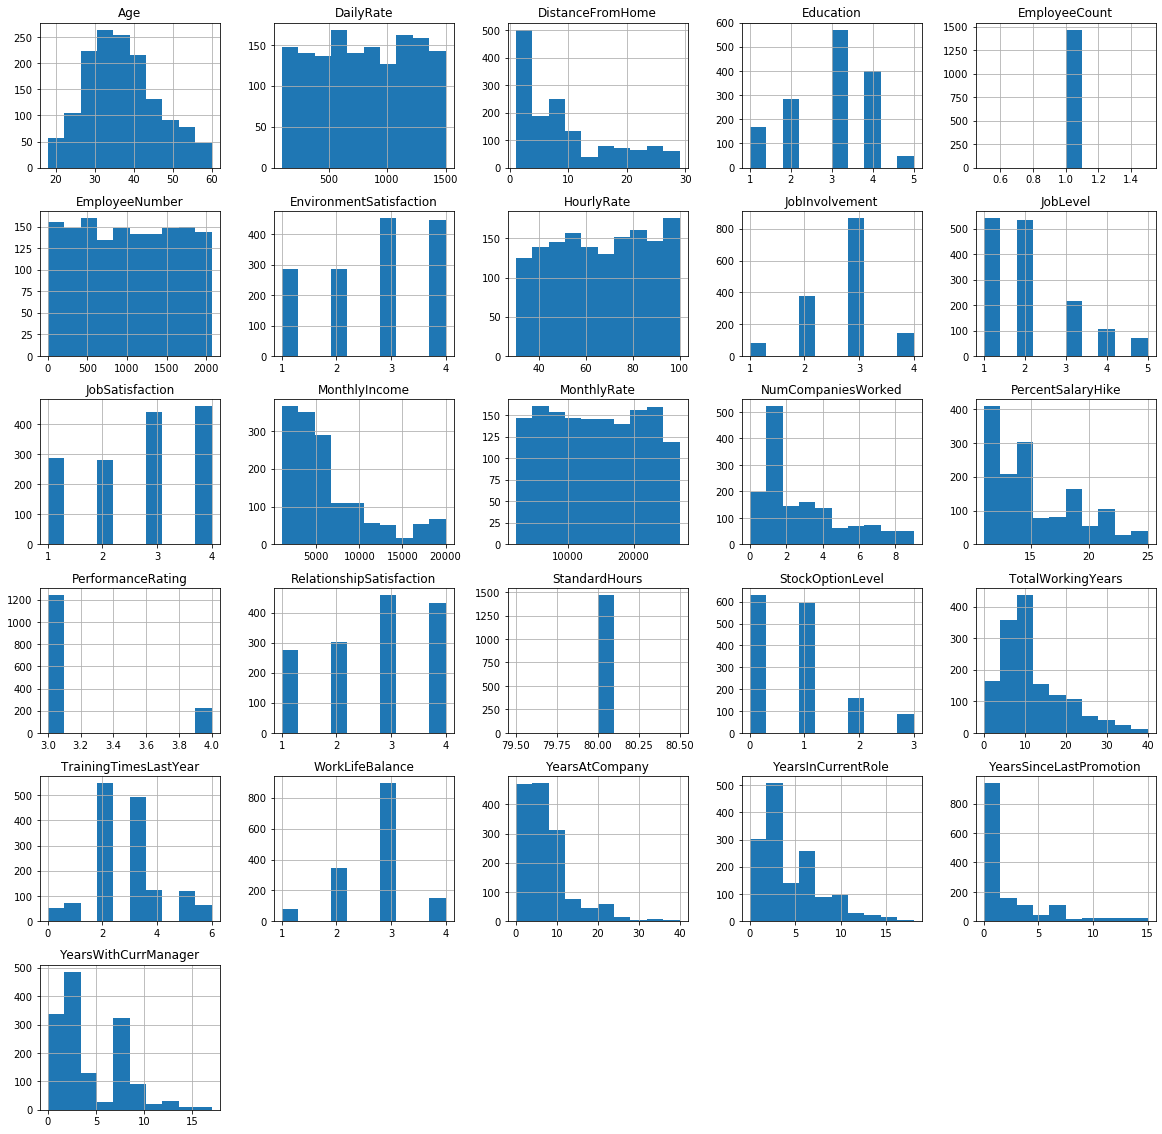

In [7]:
df.hist(figsize=(20,20))
plt.show()

Age distribution shows most of the employees are between 25 to 45 years old.
EmployeeCount and StandardHours are constant values for all employees.
EmployeeNumber is unique id for each employee.
Over18 is constant meaning working age starts from 18.

EducationField

In [8]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Overtime

In [9]:
df_OverTime = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i=0
for field in list(df['OverTime'].unique()):
    ratio = df[(df['OverTime']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['OverTime']==field].shape[0]
    df_OverTime.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    

In Yes, the ratio of leavers is 30.53%
In No, the ratio of leavers is 10.44%


Attrition

In [10]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df[df['Attrition'] == 'No'].shape[0] / df.shape[0]*100,
    df[df['Attrition'] == 'Yes'].shape[0] / df.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


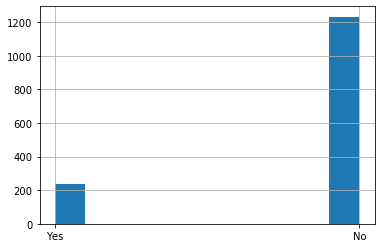

In [12]:
#use chart
df['Attrition'].hist()

Correlation

In [13]:
df_corr = df.copy()
df_corr['Target'] = df_corr['Attrition'].apply(lambda x:0 if x == 'No' else 1)
df_corr = df_corr.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_corr.corr()['Target'].sort_values()

print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


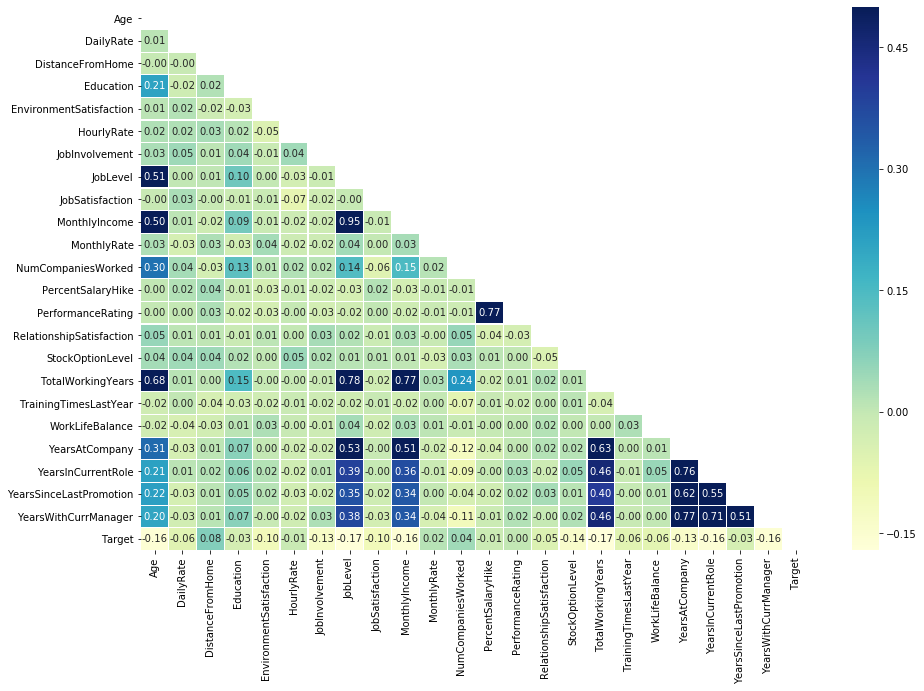

In [14]:
# Calculate correlations
corr = df_corr.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,vmax=.5,mask=mask, annot=True, fmt='.2f', linewidths=.2, cmap="YlGnBu")

EDA summary
1. There are no missing data 
2. Dataset has correct data types
3. Positive correlation with target are:
   Performance Rating, Monthly Rate, Num    Companies Worked, Distance From Home.
4. Negative correlations with target are:
   Total Working Years, Job Level, Years In Current Role, and Monthly Income.
5. Some features are redundant for our analysis such as: EmployeeCount, EmployeeNumber, StandardHours, and Over18.


In [15]:
#Dropping some column that are redundant
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


## Encoding Categorical variables

In [16]:
# Selecting out categorical variables
cat_var = df.select_dtypes('object').columns
cat_var

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df['Attrition'])

array([1, 0, 1, ..., 0, 0, 0])

In [18]:
temp = le.fit_transform(df['Attrition'])

In [19]:
temp.dtype

dtype('int32')

In [20]:
le.inverse_transform(temp)

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [21]:
Encoders= {}
for col in cat_var:
    le = LabelEncoder()
    temp = le.fit_transform(df[col])
    df[col] = temp
    Encoders[col] = le
    

In [22]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [23]:
# Encoders['Attrition'].inverse_transform(df['Attrition'])

In [24]:
print('Size of Full Encoded Dataset: {}'. format(df.shape))

Size of Full Encoded Dataset: (1470, 31)


In [25]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


## Feature Scaling

In [26]:
# Feature scaling using minmaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 3))
df_col = list(df.columns)
df_col

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [27]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 3))
df_col = list(df.columns)
df_col.remove('Attrition')
for col in df_col:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df['Attrition'] = pd.to_numeric(df['Attrition'], downcast='float')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1.642857,1.0,3.0,2.147459,3.0,0.000000,0.75,0.6,1.0,0.0,...,0.0,0.0,0.0,0.600,0.0,0.0,0.45,0.666667,0.0,0.882353
1,2.214286,0.0,1.5,0.380100,1.5,0.750000,0.00,0.6,2.0,3.0,...,3.0,3.0,1.0,0.750,1.5,2.0,0.75,1.166667,0.2,1.235294
2,1.357143,1.0,3.0,2.729420,1.5,0.107143,0.75,2.4,3.0,3.0,...,0.0,1.0,0.0,0.525,1.5,2.0,0.00,0.000000,0.0,0.000000
3,1.071429,0.0,1.5,2.770222,1.5,0.214286,2.25,0.6,3.0,0.0,...,0.0,2.0,0.0,0.600,1.5,2.0,0.60,1.166667,0.6,0.000000
4,0.642857,0.0,3.0,1.050107,1.5,0.107143,0.00,1.8,0.0,3.0,...,0.0,3.0,1.0,0.450,1.5,2.0,0.15,0.333333,0.4,0.352941


## Splitting into train and test data

In [28]:
target = df['Attrition'].copy()
type(target)

pandas.core.series.Series

In [29]:
df.drop(['Attrition'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df.shape))

Size of Full dataset is: (1470, 30)


In [30]:
# we have a heavy imbalance of class( we have more employesss with 0 than 1)


X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=24) #stratify=target) 

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

pd.Series(y_train).value_counts()

Number transactions X_train dataset:  (1102, 30)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 30)
Number transactions y_test dataset:  (368,)


0.0    930
1.0    172
Name: Attrition, dtype: int64

In [31]:
target.value_counts()

0.0    1233
1.0     237
Name: Attrition, dtype: int64

### SMOTE

Using SMOTE to handle imbalance target data.

In [32]:
smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train, y_train)
X_train = pd.DataFrame(X_train, columns=df.columns)
y_train = pd.Series(y_train, name=y_test.name)
pd.Series(y_train).value_counts()

1.0    930
0.0    930
Name: Attrition, dtype: int64

## Building Machine Learning Model

We will consider Random Forest, Support Vector Machine(SVM) and Decision Tree Classifier

In [33]:
# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.naive_bayes import GaussianNB

In [34]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, random_state=24)))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=24)))
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=24,
                                                         class_weight='balanced')))
models.append(('Gaussian NB', GaussianNB()))

In [35]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 1
# evaluate each model using cross-validation
for name, model in models:
    print(name)
    kfold = model_selection.StratifiedKFold(n_splits=15, random_state=24)  # 15-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
    model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
            model, X_train, y_train, cv=kfold, scoring='roc_auc')
    
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

Random Forest
Decision Tree Classifier
Logistic Regression
Gaussian NB


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,98.75,2.60,94.52,7.13
2,Decision Tree Classifier,86.83,7.42,86.83,7.42
3,Logistic Regression,86.17,3.23,78.66,3.72
4,Gaussian NB,81.61,5.53,70.54,4.71


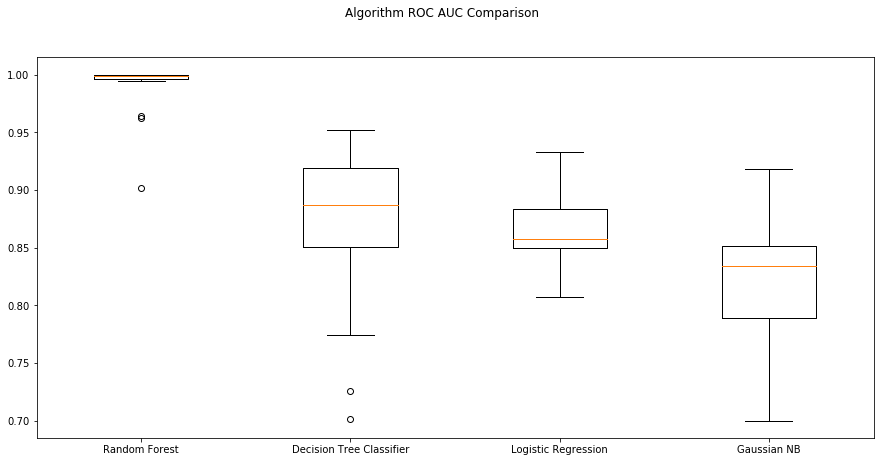

In [36]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

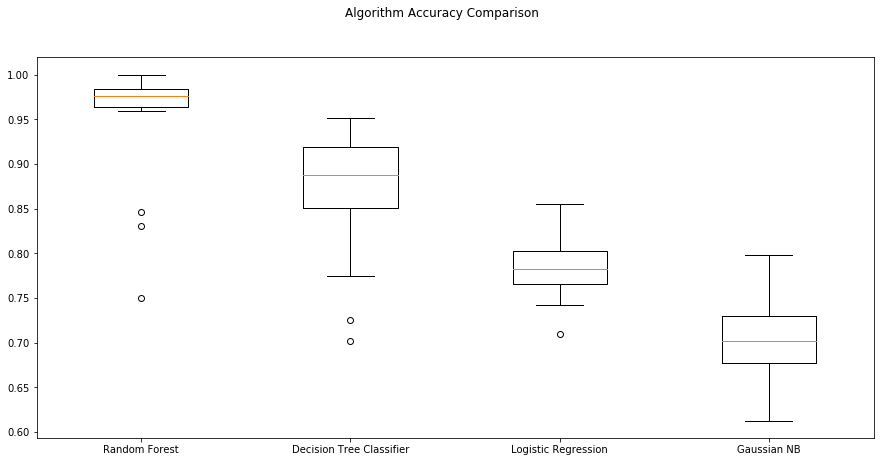

In [37]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=24)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

In [ ]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=45, ha='right', size= 12) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
names[0:5]

In [ ]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(30):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

Evaluation

In [ ]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=0.5)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))

In [ ]:
# Classification report for the optimised RF Regression
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [ ]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

Logistic Regression

In [ ]:
kfold = model_selection.StratifiedKFold(n_splits=15, random_state=24)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=24)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

Fine Tuning Logistic Regression

In [ ]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

#### Evaluation

In [ ]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

In [ ]:
# Classification report for the optimised Log Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

class O = employee that are not leaving

class 1 = employee that leaving

In [ ]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

In [ ]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
#Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
#Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

### Model conclusions

After tunning Logistic Regression and Random Forest Classifier, Logistic regression has a better AUC by just 0.03

## Conclusion

Retraining of the model is very important as new data emerges.

In putting up a strategic plan to improve retention of employees, certain feature are of more importance than others.

Most of the people leaving have cartain indicators in common:

Overtime: Most people that work over time are more likely to leave the company so the should make provision for providing enough manpower to handle a task to avoid excess overtime.

JobLevel: Employees with higher job levels are less likely to leave the company.

StockOptionLevel: Employees with more StockOptionLevel are less likely to leave. it is critical for the company to consider competitive wages in form employee stock options

JobSatisfaction: Employees who have higher level of job satisfaction are more likely to stay.

MonthlyIncome: Employees with higher monthly income are less likely to leave the company so the company, Hence the company can consider industry benchmark to offer competitive wages in order to retain employees.